# Projet Data Mining

## Affichage des donn√©es
On regarde les donn√©es dans un tableur, puis on les affiches sur une carte avec Folium. On les mets dans un Dataframe pour pouvoir les traiter plus facilement.
On remarque que pour certaines donn√©es, il manque le titre ou les tags, mais que le reste des informations sont toujours pr√©sente. Egalement, certaines photos proviennent du m√™me post, et pr√©sentent donc le m√™me titre, la m√™me date d'upload, voir m√™me la m√™me localisation.


In [1]:
# installation of required libraries and dependencies
# numeric calculations
! pip install numpy==1.26.0 
# data frames 
! pip install pandas==2.1.1 
# machine learning algorithms 
! pip install scikit-learn==1.5.1 
! pip install scipy==1.12.0
# plotting 
! pip install plotly==5.24.1 
! pip install matplotlib==3.8.0 
! pip install seaborn==0.13.2 
! pip install plotly-express==0.4.1 
! pip install chart-studio==1.1.0 
# web app library 
! pip install streamlit==1.37.1 
# association rules
! pip install mlxtend==0.23.3

! pip install nbformat==5.9.2 

! pip install folium

! pip install nltk

! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import folium
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
m = folium.Map(location=[45.6,5])

In [4]:
df_sample = pd.read_csv('flickr_data2_sample.csv')
df_sample.columns = df_sample.columns.str.strip()

for _, row in df_sample.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['title']
    ).add_to(m)


On √©tudie les valeurs sur le jeu de donn√©es

In [5]:
df = pd.read_csv('flickr_data2.csv')
df.columns = df.columns.str.strip()
df = df.sample(n=20000, random_state=1)

C:\Users\amaur\AppData\Local\Temp\ipykernel_16072\444921755.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flickr_data2.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 52249 to 192236
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   user                20000 non-null  object 
 2   lat                 20000 non-null  float64
 3   long                20000 non-null  float64
 4   tags                14972 non-null  object 
 5   title               18233 non-null  object 
 6   date_taken_minute   20000 non-null  float64
 7   date_taken_hour     20000 non-null  int64  
 8   date_taken_day      20000 non-null  int64  
 9   date_taken_month    20000 non-null  int64  
 10  date_taken_year     20000 non-null  int64  
 11  date_upload_minute  20000 non-null  object 
 12  date_upload_hour    20000 non-null  object 
 13  date_upload_day     20000 non-null  float64
 14  date_upload_month   20000 non-null  int64  
 15  date_upload_year    20000 non-null  float64
 16  Unna

In [7]:
df.isna()

id   user    lat   long   tags  title  date_taken_minute  \
52249   False  False  False  False   True  False              False   
318168  False  False  False  False  False  False              False   
124727  False  False  False  False  False  False              False   
381865  False  False  False  False   True  False              False   
415257  False  False  False  False  False  False              False   
...       ...    ...    ...    ...    ...    ...                ...   
84071   False  False  False  False  False  False              False   
299092  False  False  False  False  False  False              False   
92419   False  False  False  False  False  False              False   
195214  False  False  False  False   True  False              False   
192236  False  False  False  False  False  False              False   

        date_taken_hour  date_taken_day  date_taken_month  date_taken_year  \
52249             False           False             False            False   
318168            False           False             False            False   
124727            False           False             False            False   
381865            False           False             False            False   
415257            False           False             False            False   
...                 ...             ...               ...              ...   
84071             False           False             False            False   
299092            False           False             False            False   
92419             False           False             False            False   
195214            False           False             False            False   
192236            False           False             False            False   

        date_upload_minute  date_upload_hour  date_upload_day  \
52249                False             False            False   
318168               False             False            False   
124727               False             False            False   
381865               False             False            False   
415257               False             False            False   
...                    ...               ...              ...   
84071                False             False            False   
299092               False             False            False   
92419                False             False            False   
195214               False             False            False   
192236               False             False            False   

        date_upload_month  date_upload_year  Unnamed: 16  Unnamed: 17  \
52249               False             False         True         True   
318168              False             False         True         True   
124727              False             False         True         True   
381865              False             False         True         True   
415257              False             False         True         True   
...                   ...               ...          ...          ...   
84071               False             False         True         True   
299092              False             False         True         True   
92419               False             False         True         True   
195214              False             False         True         True   
192236              False             False         True         True   

        Unnamed: 18  
52249          True  
318168         True  
124727         True  
381865         True  
415257         True  
...             ...  
84071          True  
299092         True  
92419          True  
195214         True  
192236         True  

[20000 rows x 19 columns]

On remarque qu'il y a un probl√®me pour quelques lignes, avec des colonnes unamed qui compte 144 lignes, et une ou deux valeurs manquantes pour des dates de prises de d'upload

In [8]:
df[df[["Unnamed: 16"]].notnull().any(axis=1)]

id           user        lat      long  \
275259  27349420444   14902008@N02  45.760071  4.826847   
278435  28598912126  143241100@N07  45.767500  4.827870   
237413  19640268305   29262809@N08  45.777191  4.855163   
282273  28928383473  142707355@N06  45.772500  4.831666   
286907  29261452400  142707355@N06  45.764722  4.833055   

                                                     tags  \
275259                    france,lyon,monuments,vieuxlyon   
278435  instagramapp,square,squareformat,iphoneography...   
237413       france,rh√¥ne,villages,tourisme,villes,filoer   
282273                                                NaN   
286907                                                NaN   

                                 title  date_taken_minute  date_taken_hour  \
275259    1664 - aupreÃÄs de ma blonde              2016.0               43   
278435                      It's #Time             2016.0               42   
237413  Lyon - Le Parc de la T√™te d'Or             2015.0               15   
282273                     Vue depuis              2016.0                5   
286907         Ouvertures chr√©tiennes              2016.0               49   

        date_taken_day  date_taken_month  date_taken_year  \
275259              17                27                6   
278435               8                29                7   
237413              17                 9                7   
282273              16                 3                9   
286907              12                 3                9   

                                       date_upload_minute date_upload_hour  \
275259                                    -)   (A16-0651)               27   
278435   Lets #Burn those #Bridges.  Http://www.Joshua...               42   
237413                            le tadorne (2015 07 09)               36   
282273                                    La croix rousse               11   
286907                                Eglise Saint-nizier               11   

        date_upload_day  date_upload_month  date_upload_year  Unnamed: 16  \
275259             18.0                 28               6.0       2016.0   
278435             17.0                 29               7.0       2016.0   
237413             21.0                 12               7.0       2015.0   
282273              1.0                  9               9.0       2016.0   
286907              1.0                  9               9.0       2016.0   

        Unnamed: 17  Unnamed: 18  
275259          NaN          NaN  
278435          NaN          NaN  
237413          NaN          NaN  
282273          NaN          NaN  
286907          NaN          NaN

In [9]:
df[df[["Unnamed: 17"]].notnull().any(axis=1)]

Empty DataFrame
Columns: [id, user, lat, long, tags, title, date_taken_minute, date_taken_hour, date_taken_day, date_taken_month, date_taken_year, date_upload_minute, date_upload_hour, date_upload_day, date_upload_month, date_upload_year, Unnamed: 16, Unnamed: 17, Unnamed: 18]
Index: []

In [10]:
df[df[["Unnamed: 18"]].notnull().any(axis=1)]

Empty DataFrame
Columns: [id, user, lat, long, tags, title, date_taken_minute, date_taken_hour, date_taken_day, date_taken_month, date_taken_year, date_upload_minute, date_upload_hour, date_upload_day, date_upload_month, date_upload_year, Unnamed: 16, Unnamed: 17, Unnamed: 18]
Index: []

On observe qu'il y a sur certaines lignes un d√©callage, qui fait qu'il y a plus de colonne. Cela s'accompagne d'un mauvais formatage des dates.

## Pr√©-processing des donn√©es
On enl√®ve les duplicats du jeu de donn√©es.
On peut consid√©rer comme duplicat √©vident le cas ou l'id de la photo est le m√™me.
On enl√®ve aussi les donn√©es qui ont des probl√®mes, en particulier au niveau du formattage des dates, tels qu'identifi√©s plus t√¥t.

In [11]:
df_cleaned = df
df_cleaned = df_cleaned.drop_duplicates(keep='first')

df_cleaned = df_cleaned[df_cleaned[["Unnamed: 16"]].isnull().any(axis=1)]
df_cleaned = df_cleaned[df_cleaned[["Unnamed: 17"]].isnull().any(axis=1)]
df_cleaned = df_cleaned[df_cleaned[["Unnamed: 18"]].isnull().any(axis=1)]
df_cleaned = df_cleaned.dropna(axis=1, how='all')
df_cleaned = df_cleaned[df_cleaned[["date_upload_year"]].notna().any(axis=1)]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19223 entries, 52249 to 192236
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19223 non-null  int64  
 1   user                19223 non-null  object 
 2   lat                 19223 non-null  float64
 3   long                19223 non-null  float64
 4   tags                14392 non-null  object 
 5   title               17528 non-null  object 
 6   date_taken_minute   19223 non-null  float64
 7   date_taken_hour     19223 non-null  int64  
 8   date_taken_day      19223 non-null  int64  
 9   date_taken_month    19223 non-null  int64  
 10  date_taken_year     19223 non-null  int64  
 11  date_upload_minute  19223 non-null  object 
 12  date_upload_hour    19223 non-null  object 
 13  date_upload_day     19223 non-null  float64
 14  date_upload_month   19223 non-null  int64  
 15  date_upload_year    19223 non-null  float64
dtypes: f

On a supprimer tout les duplicats et les nulls au niveau des dates. On regarde maintenant la consistance des donn√©es √† ce niveau.
On v√©rifie que les minutes ne d√©passent pas 60, que les heures ne d√©passent pas 24, que le num√©ro du jour ne d√©passe pas 31, que le mois ne d√©passe pas 12, et que la photo n'ai pas √©t√© prise avant l'invention de la photographie num√©rique par Steven Sasson en 1975 et mise en ligne avant l'invention du World Wide Web par Tim Berners-Lee en 1989.

In [12]:
df_cleaned['date_taken_minute'] = pd.to_numeric(df_cleaned['date_taken_minute'], errors='coerce')
df_cleaned['date_taken_hour'] = pd.to_numeric(df_cleaned['date_taken_hour'], errors='coerce')
df_cleaned['date_taken_day'] = pd.to_numeric(df_cleaned['date_taken_day'], errors='coerce')
df_cleaned['date_taken_month'] = pd.to_numeric(df_cleaned['date_taken_month'], errors='coerce')
df_cleaned['date_taken_year'] = pd.to_numeric(df_cleaned['date_taken_year'], errors='coerce')

df_cleaned['date_upload_minute'] = pd.to_numeric(df_cleaned['date_upload_minute'], errors='coerce')
df_cleaned['date_upload_hour'] = pd.to_numeric(df_cleaned['date_upload_hour'], errors='coerce')
df_cleaned['date_upload_day'] = pd.to_numeric(df_cleaned['date_upload_day'], errors='coerce')
df_cleaned['date_upload_month'] = pd.to_numeric(df_cleaned['date_upload_month'], errors='coerce')
df_cleaned['date_upload_year'] = pd.to_numeric(df_cleaned['date_upload_year'], errors='coerce')

df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_minute'] > 60].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_hour'] > 24].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_day'] > 31].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_month'] > 12].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_year'] < 1975].index)

df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_minute'] > 60].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_hour'] > 24].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_day'] > 31].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_month'] > 12].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_year'] < 1989].index)


df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 52249 to 192236
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19219 non-null  int64  
 1   user                19219 non-null  object 
 2   lat                 19219 non-null  float64
 3   long                19219 non-null  float64
 4   tags                14388 non-null  object 
 5   title               17524 non-null  object 
 6   date_taken_minute   19219 non-null  float64
 7   date_taken_hour     19219 non-null  int64  
 8   date_taken_day      19219 non-null  int64  
 9   date_taken_month    19219 non-null  int64  
 10  date_taken_year     19219 non-null  int64  
 11  date_upload_minute  19219 non-null  float64
 12  date_upload_hour    19219 non-null  int64  
 13  date_upload_day     19219 non-null  float64
 14  date_upload_month   19219 non-null  int64  
 15  date_upload_year    19219 non-null  float64
dtypes: f

Cette √©tape nous permet de supprimer 25 r√©sultats.
Les colonnes sont √©galement converties pour correspondre √† un format num√©rique ad√©quat.

Enfin, on regroupe les images prises par le m√™me utilisateur aux m√™mes coordonn√©es g√©ographique, pour √©viter qu'une s√©rie de photo post√©s fausse le clustering

In [14]:
def concatenate_values(series):
    return ', '.join(series.dropna().unique())

df_cleaned = df_cleaned.groupby(['lat', 'long', 'user']).agg({
    'tags': concatenate_values,
    'title': concatenate_values,
    'id': 'first',
    'date_taken_minute': 'first',
    'date_taken_hour': 'first',
    'date_taken_day': 'first',
    'date_taken_month': 'first',
    'date_taken_year': 'first',
    'date_upload_minute': 'first',
    'date_upload_hour': 'first',
    'date_upload_day': 'first',
    'date_upload_month': 'first',
    'date_upload_year': 'first'
}).reset_index()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11834 entries, 0 to 11833
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lat                 11834 non-null  float64
 1   long                11834 non-null  float64
 2   user                11834 non-null  object 
 3   tags                11834 non-null  object 
 4   title               11834 non-null  object 
 5   id                  11834 non-null  int64  
 6   date_taken_minute   11834 non-null  float64
 7   date_taken_hour     11834 non-null  int64  
 8   date_taken_day      11834 non-null  int64  
 9   date_taken_month    11834 non-null  int64  
 10  date_taken_year     11834 non-null  int64  
 11  date_upload_minute  11834 non-null  float64
 12  date_upload_hour    11834 non-null  int64  
 13  date_upload_day     11834 non-null  float64
 14  date_upload_month   11834 non-null  int64  
 15  date_upload_year    11834 non-null  float64
dtypes: f

In [15]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=1,
        fill=True
    ).add_to(m)

m.save("map1.html")

Dans un premier temps, nous allons nous concentrer sur la latitude et la longitude pour effectuer le  clustering

## Pr√©paration des donn√©es pour le clustering

On supprime les colonnes inutiles pour ne garder que longitude et latitude pour le moment.

In [16]:
df_clustering = pd.DataFrame(data=df_cleaned)

df_clustering = df_clustering.drop(['id','user','tags','title','date_taken_minute','date_taken_hour','date_taken_day','date_taken_month','date_taken_year','date_upload_minute','date_upload_hour','date_upload_day','date_upload_month','date_upload_year'], axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
scaled_data_df.head()

[[-5.46619147  2.33878163]
 [-5.21365877 -0.44178603]
 [-5.14203491  2.07734114]
 ...
 [ 4.62027094  1.21927813]
 [ 4.6356896   1.06923925]
 [ 4.69022791  0.8621841 ]]


lat      long
0 -5.466191  2.338782
1 -5.213659 -0.441786
2 -5.142035  2.077341
3 -5.052961  1.808309
4 -5.047491  1.910727

## K Means

On utilise Elbow method pour d√©terminer graphiquement le nombre de cluster k

In [19]:
# k-means
from sklearn.cluster import KMeans

In [20]:
# number of clusters 
k = 50
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

KMeans(n_clusters=50)

In [21]:
# associated cluster labels
labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [32 16 32 ... 29 29 29]


In [22]:
# sum of squared distances
inertia = kmeans.inertia_
print(f"Sum of squared distances: {inertia}")

Sum of squared distances: 536.4491192753753


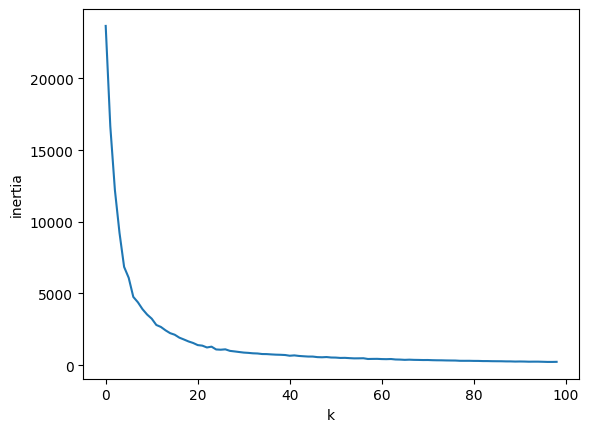

In [23]:
values=[]
for k in range(1,100):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(scaled_data_df)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    values.append(inertia)
plt.plot(values)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

A vue d'oeil, la valeur optimale de k est aux alentours de 25.

In [24]:
# number of clusters 
k = 25
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [20 20 20 ...  3  3  3]


In [25]:
df_cleaned["KMeans"] = labels

In [26]:
colors = [
    'red', 'blue', 'green', 'yellow', 'pink', 'orange', 'cyan', 'magenta', 'grey',
    'darkred', 'darkblue', 'darkgreen', 'darkyellow', 'darkpink', 'darkorange', 'darkcyan', 'darkmagenta', 'darkgrey',
    'lightred', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightorange', 'lightcyan', 'lightmagenta',
    'purple', 'darkpurple', 'lightpurple', 'brown', 'darkbrown', 'lightbrown', 'beige', 'black', 'white', 
    'gold', 'silver', 'bronze', 'lime', 'teal', 'navy', 'maroon', 'olive', 'turquoise', 'indigo', 
    'violet', 'chocolate', 'coral', 'salmon', 'khaki', 'plum', 'orchid', 'tan', 'lavender', 'peach',
    'sienna', 'azure', 'amber', 'apricot', 'chartreuse', 'periwinkle', 'seagreen', 'forestgreen', 
    'skyblue', 'dodgerblue', 'midnightblue', 'steelblue', 'slateblue', 'powderblue', 'rosybrown', 
    'firebrick', 'goldenrod', 'crimson', 'tomato', 'hotpink', 'deepskyblue', 'royalblue', 
    'lawngreen', 'springgreen', 'mediumseagreen', 'darkslategrey', 'lightslategrey', 
    'mediumaquamarine', 'lightseagreen', 'darkkhaki', 'darkorchid', 'lightsalmon', 
    'darkgoldenrod', 'darkturquoise', 'darkviolet', 'mediumspringgreen', 'mediumslateblue',
    'palegoldenrod', 'paleturquoise', 'palevioletred', 'mediumvioletred', 'mediumblue'
]



In [27]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color=colors[row['KMeans']],
        fill=True
    ).add_to(m)


m.save("map2.html")

k means ne semble pas √™tre une tr√®s bonne option. Il propose un clustering qui n'est pas r√©aliste. On se retrouve avec des points √©loign√©s mis ensembles, et avec des zones proche qui sont s√©par√©s. Par exemple, Sathonay et Vaulx en velin sont dans le m√™me cluster, mais l'Est et l'Ouest de la place Bellecour ne sont pas dans le m√™me cluster.

## Hierarchical clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

On prend le m√™me nombre de clusters que kmeans pour pouvoir comparer les deux

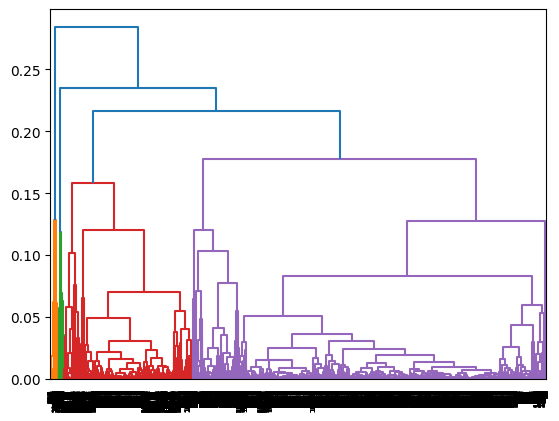

In [29]:
# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=25).fit(df_clustering)

# Get the cluster labels
labels = clustering.labels_

# If you're also using the linkage and dendrogram
Z = hierarchy.linkage(df_clustering, 'complete')
dn = hierarchy.dendrogram(Z)

In [30]:
df_cleaned["Hierarchical"] = labels

In [31]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color=colors[row['Hierarchical']],
        fill=True
    ).add_to(m)


m.save("map3.html")

C'est un peu mieux, le clustering est plus pertinent, mais il y a toujours des endroits qui ne devraient pas √™tre ensemble (comme croix rousse et t√™te d'or)

## DB Scan

In [32]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

In [33]:
X = StandardScaler().fit_transform(scaled_data_df)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.015, min_samples=30)
labels = dbscan.fit_predict(X)

df_cleaned["DBScan"] = labels

In [34]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True
        ).add_to(m)


m.save("map4.html")

On constate que DBScan est bien plus convaincant car il permet d'√©liminer de nombreux points qui n'apparaissent dans aucun cluster. C'est la m√©thode DBScan que nous utiliserons par la suite.

### Interpr√©tation des r√©sultats

Gr√¢ce √† cette analyse, on peut d√©terminer efficacement les points d'int√©r√™t de la m√©tropole de Lyon.

Comme on pouvait s'y attendre, les sites touristiques notables tels que la Cath√©drale de Fourvi√®re ou encore le vieux Lyon sont beaucoup photographi√©s. La majorit√© des photos sont prises dans le vieux Lyon et sur la Presqu'√éle (de Bellecour √† H√¥tel de Ville).
Les quais du Rhone et le pont Bonaparte poss√®dent √©galement un grand int√©r√™t, d√π au cadre aquatique qu'ils proposent.

En dehors du Centre Ville, il y a beaucoup moins de centres d'int√©r√™ts. On peut n√©anmoins souligner la Cit√© Internationale, le Parc de la T√™te d'Or ou encore l'INSA Lyon qui pr√©sente deux clusters distincts.

Afin d'am√©liorer l'exp√©rience des touristes, il faut concentrer les efforts sur le maintien et l'am√©lioration des transports en commun √† la Cath√©drale de Fourvi√®re, le Vieux Lyon et la Presqu'√éle.

## Text-Pattern Mining

On utilise un nuage de mot pour voir les mots les plus fr√©quents, et pour pouvoir nettoyer si un mot reviens tr√®s souvent mais n'est pas pertinent

In [35]:
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize

In [36]:

def show_word_cloud(li):
    text = " ".join(row for row in li if isinstance(row, str))

    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [37]:
import nltk
from nltk.corpus import stopwords

In [38]:
nltk.download('stopwords')

stop_words = set(stopwords.words('french'))
stop_words_en = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


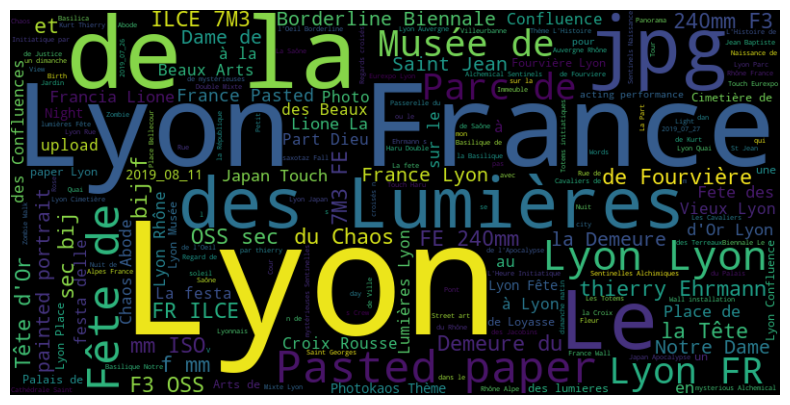

In [39]:
word_token = [word_tokenize(row, preserve_line=True) for row in df_cleaned['title'] if isinstance(row, str)]
word_token_list = [item for sublist in word_token for item in sublist]
show_word_cloud(word_token_list)

On affiche les mots les plus pr√©sents dans les titres. On constate la pr√©sence de certains mots qui ne nous permettront pas d'effectuer une analyse pr√©cise.

On devra donc filtrer la liste de mots actuelle pour obtenir une liste de mots √©tudiable.

In [40]:
trash_words = {'lyon', 'france', "'s", 'photo', ".jpg", '@', ',', '(', ')', "!", ":", '?', '-', "'m", ';'}
for i in stop_words:
    trash_words.add(i)
for i in stop_words_en:
    trash_words.add(i)

print(trash_words)

{'!', 'ont', 'which', 'avait', 'had', 'eut', 'now', 'c', 'eue', 's', "mightn't", 'ta', 'it', 'ain', 'below', 'et', 'couldn', 'and', 'eus', 'just', 'eu', 'am', 'o', 'myself', 'sur', '√©tais', 'won', "'m", 'mon', 'such', 'until', 'furent', 'auront', "weren't", "you've", 'seront', 'he', 'soyez', 'in', 'auras', 'par', 'no', 'soyons', '√©tante', "you'll", 'off', 'a', 'when', 'la', 'under', 'avec', 'soient', 'aurais', 'will', 'doesn', 'suis', 'pas', 'me', ':', 'during', 'if', 'm', 'hasn', 'seraient', 'une', 'can', 'aura', 'once', 'serons', 'l', 'ours', 'weren', 'were', 'ayons', 'ce', 'how', 'you', "that'll", 'more', 'themselves', '√©tantes', 'some', "won't", 'is', 'being', 'as', 'so', 'seriez', 'my', 'each', 'toi', 'all', 't', 'fussions', 'eussent', 'over', 'don', "should've", 'il', 'fus', "hadn't", 'out', "needn't", 'serais', 'fusse', 'fut', 'f√ªmes', 'haven', "you'd", 'au', 'ourselves', 'its', 'having', 'des', 'theirs', 'ton', 'up', "aren't", 'needn', 'vos', 'avions', 'between', 'n', 'not'

On ajoute certains mots √† la liste des mots ignor√©s, notamment Lyon, France et photo qui s'appliquent √† toutes les photos de notre base de donn√©es.

On ajoute √©galement certains caract√®res de ponctuation.

In [41]:
filtered_tokens = []
for i in word_token_list:
    if i.lower() not in trash_words and ".jpg" not in i.lower():
        filtered_tokens.append(i)
print(filtered_tokens)

['P√¢querette', 'Gu√™pes', 'Sursis', 'Z2', 'entre', 'Givors', 'No√´l', 'brouillard', 'dissipe', '...', 'DSCF1143', 'Perles', "d'eau", 'Brouillard', "d'hiver", 'DSCF1178', 'DSCF1147', 'Paquerettes', 'Baies', 'Brouillard', 'DSCF1201', 'soleil', 'cache', 'Nuit', '√©toil√©e', 'DSC_0061', 'DSC_0015', 'DSC_0054', 'Sellettes', 'DSCF8798', 'DSCF8809', 'TER', '2N', '631', 'BB', '22309', 'Feyzin', 'dark', 'point', '69-Feyzin', '*', 'Raffinerie', 'Feyzin', 'Die', 'Raffinerien', 'meiner', 'Kindheit', '1/2', 'Tulipe', 'Rue', 'marcel', 'Merieux', 'ZI', 'corbas', 'si', 'jouait', 'grumz', 'Bon', 'prochaine', 'fois', 'cette', 'salle', 'pense', 'prendre', '35mm', '#', 'epiceriemoderne', 'Radio', 'Elvis', "l'epicerie", 'Moderne', '69', '27/03/19', 'JL', 'Prades', 'Reversed', 'Low', 'Radio', 'Elvis', "l'epicerie", 'Moderne', '69', '27/03/19', 'TvB', 'Kurt', 'Vile', '&', 'Violators', "L'√âpicerie", 'Moderne', '21/11/15', 'Radio', 'Elvis', "l'epicerie", 'Moderne', '69', '27/03/19', '‚ô´', 'Dj', 'Krush', 'li

On enl√®ve √©galement les fichiers dont le nom contient ".jpg". On consid√®re que l'utilisateur n'a pas renomm√© le fichier et le nom de fichier de nous fournira alors aucune information int√©ressante.

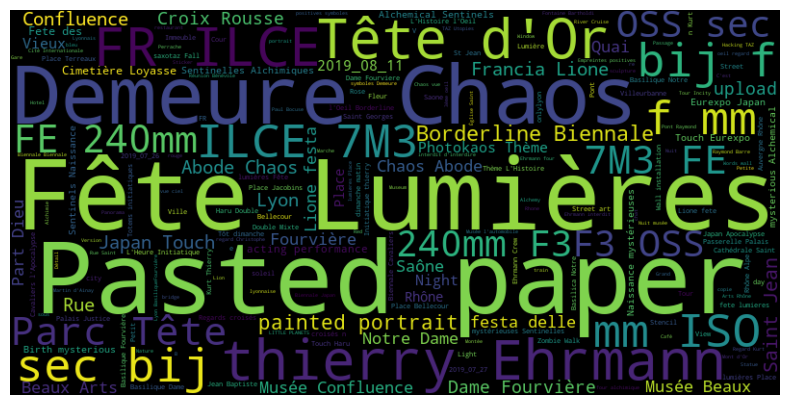

In [42]:
show_word_cloud(filtered_tokens)

On obtient d√©sormais une liste de mots que nous pourrons utiliser pour notre analyse.

In [43]:
def clean_word_row(row):
    clean = []
    if isinstance(row, str):
        t = word_tokenize(row, preserve_line=True) 
        for i in t:
            if i.lower() not in trash_words and ".jpg" not in i.lower() and not any(char.isdigit() for char in i):
                clean.append(i)
    return " ".join(clean)
df_cleaned["words"] = [clean_word_row(i) for i in df_cleaned["title"]]

On utilise TF IDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
# Fusionner les mots par cluster
df_grouped = df_cleaned.groupby('DBScan')['words'].apply(lambda x: ' '.join(x)).reset_index()

# Appliquer TF-IDF
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2)
X = vectorizer.fit_transform(df_grouped['words'])

# Extraire les mots-cl√©s
feature_names = vectorizer.get_feature_names_out()
top_n = 5  # Nombre de mots-cl√©s √† extraire
cluster_keywords = {}

for i, cluster in enumerate(df_grouped['DBScan']):
    scores = X[i].toarray().flatten()
    top_words = [feature_names[idx] for idx in scores.argsort()[-top_n:][::-1]]
    cluster_keywords[cluster] = ', '.join(top_words)

# Ajouter les noms de clusters au DataFrame original
df_cleaned['nom_cluster'] = df_cleaned['DBScan'].map(cluster_keywords)

# V√©rification du r√©sultat
print(df_cleaned[['DBScan', 'nom_cluster']].drop_duplicates())

       DBScan                                        nom_cluster
0          -1                      paper, pasted, or, parc, t√™te
119         0               –Ω–∞, flottants, flowers, flux, follow
614         1           confluences, mus√©e, confluence, iso, sec
987         2  biennale, mondes, flottants, confluence, sucri√®re
2685        3                bellecour, place, roue, grande, eos
2962        4             band, bellecour, lgbt, fi√©rt√©s, marche
3540        5       bonaparte, pont, justice, passerelle, palais
3696        6            roman, nuits, fourvi√®re, battle, romain
3714        7        c√©lestins, th√©√¢tre, parking, printemps, lfl
3851        8              jean, st, cath√©drale, vieux, baptiste
4131        9              r√©publique, place, hotel, auto, carpe
4206       10               jacobins, place, fontaine, g√©nie, mm
4545       11               justice, palais, passerelle, fr, iso
5021       12         justice, palais, passerelle, weight, sa√¥ne
5383      

In [46]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True,
            popup=[row["nom_cluster"]]
        ).add_to(m)

m.save("map5.html")

On rajoutes les tags

In [47]:
df_cleaned["words2"] = [clean_word_row(i) for i in df_cleaned["tags"]]

# Fusionner les mots par cluster
df_grouped = df_cleaned.groupby('DBScan')['words2'].apply(lambda x: ' '.join(x)).reset_index()

# Appliquer TF-IDF
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2)
X = vectorizer.fit_transform(df_grouped['words2'])

# Extraire les mots-cl√©s
feature_names = vectorizer.get_feature_names_out()
top_n = 5  # Nombre de mots-cl√©s √† extraire
cluster_keywords = {}

for i, cluster in enumerate(df_grouped['DBScan']):
    scores = X[i].toarray().flatten()
    top_words = [feature_names[idx] for idx in scores.argsort()[-top_n:][::-1]]
    cluster_keywords[cluster] = ', '.join(top_words)

# Ajouter les noms de clusters au DataFrame original
df_cleaned['nom_cluster'] = df_cleaned['DBScan'].map(cluster_keywords)

# V√©rification du r√©sultat
print(df_cleaned[['DBScan', 'nom_cluster']].drop_duplicates())

       DBScan                                        nom_cluster
0          -1     streetart, croixrousse, collage, paper, pasted
119         0  ÌîÑÎûëÏä§, frau, frenchpolitician, frenchiboo, frenc...
614         1  mus√©edesconfluences, confluence, mus√©e, conflu...
987         2  artcontemporain, lasucri√®re, sucri√®re, biennal...
2685        3  bellecour, placebellecour, place, roue, grande...
2962        4  bellecour, musicalinstrument, mand, retrato, r...
3540        5                   sa√¥ne, river, pont, bridge, sang
3696        6       nuits, theatre, romain, concert, galloromain
3714        7  parking, celestins, c√©lestins, th√©√¢tredesc√©les...
3851        8  vieuxlyon, cath√©drale, saintjean, cathedral, c...
4131        9         exif, r√©publique, place, republique, apple
4206       10  jacobins, fontaine, placedesjacobins, fountain...
4545       11  palaisdejustice, passerelle, sa√¥ne, passerelle...
5021       12  palaisdejustice, passerelledupalaisdejustice, ...
5383   

In [48]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True,
            popup=[row["nom_cluster"]]
        ).add_to(m)


m.save("map6.html")

On obtient un nommage des clusters plut√¥t bon. On obtient les meilleurs r√©sultats pour les lieux visit√©s durant toute l'ann√©e comme Fourvi√®re, le Vieux Lyon, les ponts, etc.

L√† o√π le nommage des clusters est le moins efficace c'est aux endroit o√π la fr√©quentation d√©pend beaucoup de la p√©riode de l'ann√©e. Cela se voit beaucoup sur la Presqu'√Æle avec le mot "lumi√®res" notamment. On peut √©galement noter l'importance du festival des 24h de l'INSA.

On regroupe les deux pour utiliser √† la fois les titres et les tags pour le nommage des clusters

In [49]:
df_cleaned['word_total'] = df_cleaned['words'] + ' ' + df_cleaned['words2']

df_grouped = df_cleaned.groupby('DBScan')['word_total'].apply(lambda x: ' '.join(x)).reset_index()

# Appliquer TF-IDF
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2)
X = vectorizer.fit_transform(df_grouped['word_total'])

# Extraire les mots-cl√©s
feature_names = vectorizer.get_feature_names_out()
top_n = 5  # Nombre de mots-cl√©s √† extraire
cluster_keywords = {}

for i, cluster in enumerate(df_grouped['DBScan']):
    scores = X[i].toarray().flatten()
    top_words = [feature_names[idx] for idx in scores.argsort()[-top_n:][::-1]]
    cluster_keywords[cluster] = ', '.join(top_words)

# Ajouter les noms de clusters au DataFrame original
df_cleaned['nom_cluster'] = df_cleaned['DBScan'].map(cluster_keywords)

# V√©rification du r√©sultat
print(df_cleaned[['DBScan', 'nom_cluster']].drop_duplicates())

       DBScan                                        nom_cluster
0          -1        paper, pasted, streetart, croixrousse, parc
119         0             ÌîÑÎûëÏä§, francais, frau, fran»õa, fran√ßaise
614         1  confluences, mus√©e, confluence, mus√©edesconflu...
987         2  biennale, sucri√®re, artcontemporain, lasucri√®r...
2685        3     bellecour, placebellecour, place, roue, grande
2962        4              bellecour, brass, trumpet, band, lgbt
3540        5         sa√¥ne, pont, bonaparte, zombie, passerelle
3696        6             nuits, theatre, romain, roman, antique
3714        7  c√©lestins, celestins, th√©√¢tre, parking, th√©√¢tr...
3851        8       cath√©drale, vieuxlyon, st, vieux, primatiale
4131        9         r√©publique, place, exif, republique, hotel
4206       10  jacobins, fontaine, place, placedesjacobins, f...
4545       11  passerelle, justice, palais, palaisdejustice, ...
5021       12  justice, palais, passerelle, palaisdejustice, ...
5383 

In [50]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True,
            popup=[row["nom_cluster"]]
        ).add_to(m)

m.save("map7.html")

On utilise d'autres algos pour comparer.
On ne peut pas utiliser apriori, dans le cas du sample avec 20000 lignes, l'array ferait 60 Gb, ce qui cause une erreur.


In [50]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
df_cleaned['word_total_li'] = df_cleaned['word_total'].apply(lambda x: x.split())
cluster_groups = df_cleaned.groupby('DBScan')['word_total_li'].apply(list)

def apply_apriori(cluster_words, min_support=0.1):
    te = TransactionEncoder()
    te_ary = te.fit(cluster_words).transform(cluster_words)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    return frequent_itemsets

cluster_names = {}

for cluster_id, words in cluster_groups.items():
    try:
        frequent_itemsets = apply_apriori(words, min_support=0.1)
        
        if not frequent_itemsets.empty:
            most_frequent = frequent_itemsets.loc[frequent_itemsets['support'].idxmax()]
            cluster_names[cluster_id] = ', '.join(most_frequent['itemsets'])
        else:
            cluster_names[cluster_id] = 'Unnamed'
        
        print(f"Cluster {cluster_id}: {cluster_names[cluster_id]}")
    except MemoryError:
        print(f"MemoryError: Skipping cluster {cluster_id} due to size")
        cluster_names[cluster_id] = 'Unnamed (MemoryError)'

df_cleaned['nom_cluster'] = df_cleaned['DBScan'].map(cluster_names)



Cluster -1: Unnamed
Cluster 0: Unnamed
Cluster 1: Mus√©e
Cluster 2: artcontemporain
Cluster 3: bellecour
Cluster 4: europe
Cluster 5: night
Cluster 6: Unnamed
Cluster 7: C√©lestins
Cluster 8: vieuxlyon
Cluster 9: R√©publique
Cluster 10: Jacobins
Cluster 11: rh√¥ne
Cluster 12: Palais
Cluster 13: Fourvi√®re
Cluster 14: Unnamed
Cluster 15: mus√©e
Cluster 16: Temple
Cluster 17: Nizier
Cluster 18: mus√©e
Cluster 19: op√©ra
Cluster 20: Lyonnais
Cluster 21: croixrousse
Cluster 22: mac
MemoryError: Skipping cluster 23 due to size
Cluster 24: boardgame


In [52]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True,
            popup=[row["nom_cluster"]]
        ).add_to(m)


m.save("map8.html")

On observe que le r√©sultat est moins convaincant, avec certains clusters qui n'ont pas de noms, et d'autres qui ont des noms qui ne semblent pas tr√®s pertinents. Cependant, certains clusters des zones touristiques donnent de tr√®s bon r√©sultat (fourvi√®re, bellecour, celestin, jacobins), m√™me si d'autrs ne marchent pas (vieux lyon, ruines gallo romaines)

On essaie une variante avec les r√®gles d'associations

In [ ]:
df_cleaned['word_total_li'] = df_cleaned['word_total'].apply(lambda x: x.split())

cluster_groups = df_cleaned.groupby('DBScan')['word_total_li'].apply(list)

def apply_association_rules(cluster_words, min_support=0.1, min_threshold=0.5):
    te = TransactionEncoder()
    te_ary = te.fit(cluster_words).transform(cluster_words)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    if df.empty:
        return pd.DataFrame()
    
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

    if frequent_itemsets.empty:
        return pd.DataFrame()

    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold, num_itemsets=1)
    return rules

cluster_names = {}

for cluster_id, words in cluster_groups.items():
    try:
        if len(words) > 1:
            rules = apply_association_rules(words, min_support=0.1, min_threshold=0.5)
        else:
            cluster_names[cluster_id] = 'Unnamed (Not Enough Data)'

        
        if rules is not None and not rules.empty:
            best_rule = rules.loc[rules['lift'].idxmax()]
            antecedents = ', '.join(best_rule['antecedents'])
            consequents = ', '.join(best_rule['consequents'])
            cluster_names[cluster_id] = f"{antecedents}, {consequents}"
        else:
            cluster_names[cluster_id] = 'Unnamed'
        
        print(f"Cluster {cluster_id}: {cluster_names[cluster_id]}")
    except MemoryError:
        print(f"MemoryError: Skipping cluster {cluster_id} due to size")
        cluster_names[cluster_id] = 'Unnamed (MemoryError)'

df_cleaned['nom_cluster'] = df_cleaned['DBScan'].map(cluster_names)

In [ ]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True,
            popup=[row["nom_cluster"]]
        ).add_to(m)


m.save("map9.html")

Conclusion : les r√®gles d'association ne sont vraiment pas tr√®s bonnes, on a quelques-uns qui sont bien, mais √©normement de clusters mal ou non nomm√©es.

## Analyse Temporelle

On va tout d'abord s√©parer les diff√©rents tags afin de pouvoir les analyser plus facilement.

In [51]:
df_exploded = df_cleaned.explode('words')
df_exploded = df_exploded[df_exploded['words'].str.strip() != '']

### Analyse Pr√©alable

On affiche tout d'abord les 5 tags les plus populaires par mois pour se faire une id√©e des donn√©es.

In [52]:
tag_counts_by_month = df_exploded.groupby(['date_taken_month', 'words']).size().unstack(fill_value=0)

top_tags_per_month = tag_counts_by_month.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

print(top_tags_per_month)

date_taken_month
1                     [LITTLE PLANETS |, upload, EXT |]
2     [Ascie, Convention Tattoos piercings, T√¥t dima...
3     [T√¥t dimanche matin, Parc T√™te d'Or, Pasted pa...
4                   [Pasted paper [ ], Avril, abstract]
5                          [--, Parc T√™te d'Or, upload]
6     [Parc T√™te d'Or, Marche fi√©rt√©s LGBT, Fiert√© L...
7     [FR FE OSS sec. bij f mm ISO, Flux, Parc T√™te ...
8      [halles paul bocuse, Confluence, Parc T√™te d'Or]
9        [Zombie Walk, Zombie Walk Revolutions, upload]
10    [St Jean Croix rousse, Ldoll, Strikers Protest...
11    [Urba, November, Cimeti√®re Loyasse Cazenove-Br...
12    [F√™te Lumi√®res, Francia Lione festa delle, F√™t...
dtype: object


On constate que, au-del√† des noms de lieux importants, les diff√©rents √©v√®nements de l'ann√©e ont une grande influence sur nos donn√©es.

On retrouve par exemple "Avril", "Marche fi√©rt√©s LGBT", "Zombie Walk", "November" et "F√™te Lumi√®res" qui correspondent tous √† des √©v√®nements se passant sur une p√©riode pr√©cise de l'ann√©e.

On va maintenant chercher √† d√©terminer quels tags sont les plus influenc√©s par la p√©riode de l'ann√©e. On pourra apr√®s les supprimer des tags utilis√©s car ils ne repr√©sentent pas des centres d'int√©r√™t constants dans le temps.

### Variabilit√© des tags (par mois)

On trie les tags par √©cart type (en nombre de fois que le tag est utilis√© par mois).

In [53]:
tag_month_variability = tag_counts_by_month.std()

tags_most_variable_month = tag_month_variability.sort_values(ascending=False)

print(tags_most_variable_month.head(20))

words
FR FE OSS sec. bij f mm ISO                                35.507042
F√™te Lumi√®res                                              22.927257
--                                                          9.814955
Francia Lione festa delle                                   9.814955
F√™te lumi√®res                                               8.660254
EXT |                                                       5.961366
Parc T√™te d'Or                                              4.999242
LITTLE PLANETS |                                            4.907477
Urba                                                        4.330127
Lumi√®res                                                    4.041452
Flux                                                        3.752777
Zombie Walk                                                 3.729489
upload                                                      3.228660
St Jean Croix rousse                                        3.175426
FR FE OSS sec. bij f m

On observe bien les tags remarqu√©s pr√©c√©demment comme "F√™te Lumi√®res" ou encore "Marche fi√©rt√©s LGBT".

On va donc visualiser l'√©volution de l'utilisation de certains de ces tags par mois.

On remarque cependant que certains tags apparaissent plusieurs fois alors que leur sens est le m√™me. (F√™te Lumi√®res, F√™te lumi√®res, Lumi√®res). Pour √©viter ce probl√®me on aurait pu lemmatiser les tags pour les regrouper selon leur s√©mantique.

In [54]:
tags_interet_month = ['F√™te lumi√®res', 'Marche fi√©rt√©s LGBT', 'Zombie Walk Revolutions', 'LITTLE PLANETS |']

df_time_filtered_month = df_exploded[df_exploded['words'].isin(tags_interet_month)]
tag_counts_by_month = df_time_filtered_month.groupby(['date_taken_month', 'words']).size().unstack(fill_value=0)

all_months = np.arange(1, 13)
tag_counts_by_month = tag_counts_by_month.reindex(all_months, fill_value=0)

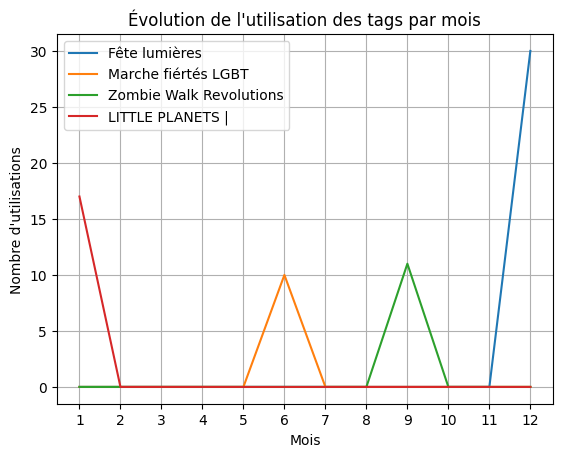

In [55]:
plt.figure()

for tag in tags_interet_month:
    plt.plot(tag_counts_by_month.index, tag_counts_by_month[tag])

plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisations")
plt.title("√âvolution de l'utilisation des tags par mois")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(tags_interet_month)
plt.show()

On constate bel et bien que ces tags ne sont utilis√©s que lors de leur mois sp√©cifique.
\
On peut alors consid√©rer qu'il est int√©ressant d'exclure ces tags lors de notre analyse.

Avant de passer √† l'exclusion de certains mots, on va effectuer la m√™me analyse, mais par heure cette fois.

### Variabilit√© des tags (par heure)

On affiche d'abord les tags les plus populaires par heure.

In [56]:
tag_counts_by_hour = df_exploded.groupby(['date_taken_hour', 'words']).size().unstack(fill_value=0)
top_tags_per_hour = tag_counts_by_hour.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)
print(top_tags_per_hour)

date_taken_hour
0      [F√™te Lumi√®res, Space invader [ ], Tour Oxyg√®ne]
1     [Fete lumieres, F√™te lumi√®res Rousse, # # # up...
2     [upload, Palais Bourse, # Paroisse # Catholiqu...
3     [Panorama Notre-Dame Fourvi√®re #, upload, Basi...
4     [Concours mba_lyon onlylyon igerslyon. # selfi...
5     [T√¥t dimanche matin, upload, # brocante # appa...
6          [T√¥t dimanche matin, upload, -- Along river]
7     [St Jean Croix rousse, T√¥t dimanche matin, upl...
8          [T√¥t dimanche matin, Parc T√™te d'Or, upload]
9                          [Parc T√™te d'Or, --, upload]
10    [Parc T√™te d'Or, FR FE OSS sec. bij f mm ISO, --]
11    [FR FE OSS sec. bij f mm ISO, Parc T√™te d'Or, --]
12    [EXT |, FR FE OSS sec. bij f mm ISO, -- Road R...
13    [FR FE OSS sec. bij f mm ISO, Confluence, ... ...
14    [FR FE OSS sec. bij f mm ISO, -- Basilique Dam...
15    [FR FE OSS sec. bij f mm ISO, Pasted paper [ ]...
16    [Pasted paper [ ], FR FE OSS sec. bij f mm ISO...
17    [LITTLE PLAN

On affiche ensuite les tags dont la pr√©sence varie le plus selon l'heure.

In [57]:
tag_hour_variability = tag_counts_by_hour.std()
tags_most_variable_hour = tag_hour_variability.sort_values(ascending=False)
print(tags_most_variable_hour.head(20))

words
FR FE OSS sec. bij f mm ISO                                8.828376
Parc T√™te d'Or                                             6.804597
F√™te Lumi√®res                                              5.616842
EXT |                                                      4.128155
LITTLE PLANETS |                                           3.470110
Pasted paper [ ]                                           3.120468
F√™te lumi√®res                                              3.025256
Francia Lione festa delle                                  3.020462
--                                                         3.006033
T√¥t dimanche matin                                         2.377430
upload                                                     2.296816
Zombie Walk                                                2.211629
Confluence                                                 2.206299
-- Basilique Dame Fourviere                                2.041241
Zombie Walk Revolutions             

In [58]:
tags_interet_hour = ["Parc T√™te d'Or", 'F√™te Lumi√®res', 'T√¥t dimanche matin', 'Confluence']

df_time_filtered_hour = df_exploded[df_exploded['words'].isin(tags_interet_hour)]
tag_counts_by_hour = df_time_filtered_hour.groupby(['date_taken_hour', 'words']).size().unstack(fill_value=0)

all_hours = np.arange(1, 25)
tag_counts_by_hour = tag_counts_by_hour.reindex(all_hours, fill_value=0)

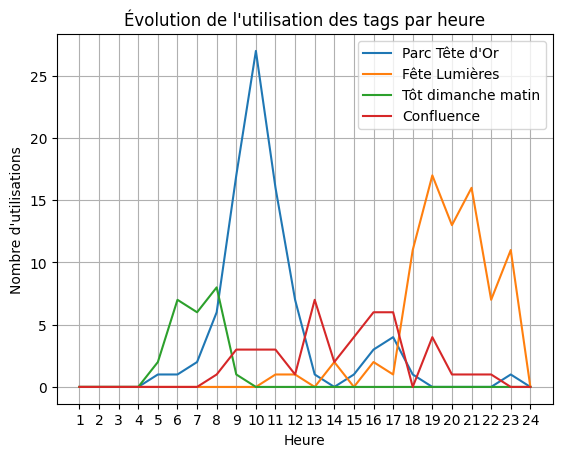

In [59]:
plt.figure()

for tag in tags_interet_hour:
    plt.plot(tag_counts_by_hour.index, tag_counts_by_hour[tag])

plt.xlabel("Heure")
plt.ylabel("Nombre d'utilisations")
plt.title("√âvolution de l'utilisation des tags par heure")
plt.xticks(range(1, 25))
plt.grid(True)
plt.legend(tags_interet_hour)
plt.show()

Pour l'analyse temporelle, on constate que de nombreux tags sont souvent utilis√©s √† une p√©riode pr√©cise de la journ√©e.
\
Par exemple, "F√™te Lumi√®res" est surtout utilis√© le soir, "Confluence" est utilis√© plut√¥t dans l'apr√®s-midi et "Parc T√™te d'Or" est utilis√© le matin.

Ces tags nous donnent une bonne id√©e des habitudes des utilisateurs de l'application et peuvent nous aider √† d√©terminer les horaires d'affluence de certains lieux importants.

### Exclusion des tags les plus variables

On va donc exclure les tags qui varient le plus en fonction du mois de l'ann√©e.

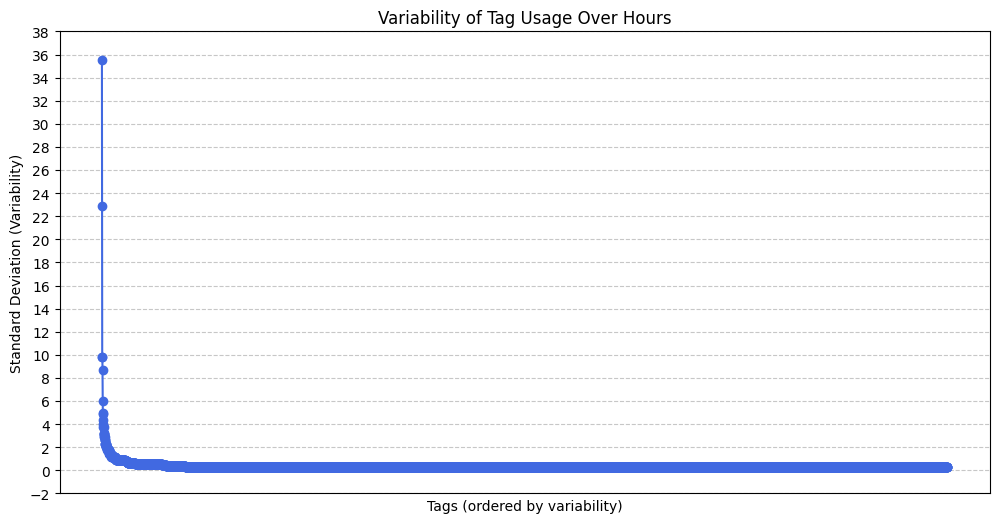

In [60]:
plt.figure(figsize=(12, 6))
x = np.arange(len(tags_most_variable_month))
plt.plot(x, tags_most_variable_month.values, marker='o', linestyle='-', color='royalblue')

plt.xlabel("Tags (ordered by variability)")
plt.ylabel("Standard Deviation (Variability)")
plt.title("Variability of Tag Usage Over Hours")
plt.xticks([])
plt.grid(axis='y', linestyle='--', alpha=0.7)

y_min, y_max = plt.ylim()
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 2))

plt.show()

Graphiquement, on d√©termine que l'on va exclure les valeurs pour lesquelles l'√©cart-type est plus grand que 1.00.

In [61]:
tags_to_keep = tag_month_variability[tag_month_variability <= 1.00].index

df_final = df_cleaned[df_cleaned['words'].apply(lambda tags: any(tag in tags_to_keep for tag in tags.split()))]

On effectue √† nouveau DBScan sur le DataFrame obtenu.

### DBScan

In [62]:
df_clustering_final = pd.DataFrame(data=df_final)
df_clustering_final = df_clustering_final.drop(['id','user','tags','title','date_taken_minute','date_taken_hour','date_taken_day','date_taken_month','date_taken_year','date_upload_minute','date_upload_hour','date_upload_day','date_upload_month','date_upload_year','DBScan','words','nom_cluster','words2','word_total'], axis=1)

In [63]:
scaler_final = StandardScaler()
scaled_data_final = scaler_final.fit_transform(df_clustering_final)
scaled_data_df_final = pd.DataFrame(data=scaled_data_final, columns=df_clustering_final.columns)

In [64]:
X = StandardScaler().fit_transform(scaled_data_df_final)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.035, min_samples=30)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(X)

# Add the cluster labels to the original DataFrame
df_final["DBScan-2"] = labels

C:\Users\amaur\AppData\Local\Temp\ipykernel_16072\2220153216.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["DBScan-2"] = labels


In [65]:
m = folium.Map(location=[45.6,5])
for _, row in df_final.iterrows():
    if row['DBScan-2'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan-2']],
            fill=True
        ).add_to(m)


m.save("map10.html")

### Affichage du nom des clusters

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fusionner les mots par cluster
df_grouped_final = df_final.groupby('DBScan-2')['words'].apply(lambda x: ' '.join(x)).reset_index()

# Appliquer TF-IDF
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2)
X = vectorizer.fit_transform(df_grouped_final['words'])

# Extraire les mots-cl√©s
feature_names = vectorizer.get_feature_names_out()
top_n = 5  # Nombre de mots-cl√©s √† extraire
cluster_keywords = {}

for i, cluster in enumerate(df_grouped_final['DBScan-2']):
    scores = X[i].toarray().flatten()
    top_words = [feature_names[idx] for idx in scores.argsort()[-top_n:][::-1]]
    cluster_keywords[cluster] = ', '.join(top_words)

# Ajouter les noms de clusters au DataFrame original
df_final['nom_cluster_2'] = df_final['DBScan-2'].map(cluster_keywords)

# V√©rification du r√©sultat
print(df_final[['DBScan-2', 'nom_cluster_2']].drop_duplicates())

      DBScan-2                                      nom_cluster_2
2           -1                chaos, ehrmann, parc, thierry, t√™te
574          0        confluences, mus√©e, confluence, hugo, alpes
2439         1               bmx, guilloti√®re, dieu, ink, marches
2582         2            bellecour, grande, canon, eos, passages
3604         3       bonaparte, zombie, justice, passerelle, road
3657         4  c√©lestins, th√©√¢tre, parking, untitled, cr√©puscule
3880         5          vieux, cath√©drale, st, traboule, baptiste
3926         7      r√©publique, auto, wednesday, republique, parc
4030         6          jacobins, fontaine, g√©nie, rose, festival
4309         8        justice, palais, passerelle, sa√¥ne, antoine
5104         9         dame, notre, basilica, fourviere, panorama
6477        10         bourse, palais, cordeliers, vendredi, arts
7530        11                terreaux, arts, beaux, mus√©e, ville


C:\Users\amaur\AppData\Local\Temp\ipykernel_16072\43857615.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['nom_cluster_2'] = df_final['DBScan-2'].map(cluster_keywords)


On obtient de bien meilleurs mots-cl√©s en ayant exclus les tags d√©pendant du mois.

In [67]:
from scipy.spatial import ConvexHull

In [68]:
m = folium.Map(location=[45.6, 5])

unique_clusters = df_final['DBScan-2'].unique()
unique_clusters = unique_clusters[unique_clusters != -1]

for cluster in unique_clusters:
    cluster_points = df_final[df_final['DBScan-2'] == cluster][['lat', 'long']].values
    
    if len(cluster_points) >= 3:
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices].tolist()

        folium.Polygon(
            locations=hull_points,
            color=colors[cluster],
            fill=True,
            fill_opacity=0.4,
            popup=df_final[df_final['DBScan-2'] == cluster]['nom_cluster_2'].iloc[0]
        ).add_to(m)

m.save("map11.html")


## Conclusion

Gr√¢ce √† cette √©tude, nous avons pu d√©terminer les points d'int√©r√™t de la m√©tropole de Lyon.

La majorit√© d'entre-eux se situent dans le Vieux Lyon ou la Presqu'√éle. Ils sont souvent li√©s √† un monument historique important comme la Basilique de Fourvi√®re ou la cath√©drale Saint-Jean.

La fr√©quentation de ces diff√©rents points d'int√©r√™t varie selon les p√©riodes de l'ann√©e et le moment de la journ√©e (le parc de la T√™te d'Or est plut√¥t visit√© le matin tandis que Confluences et pris√© l'apr√®s-midi). Il y a √©galement des grandes variations de fr√©quentation lors des diff√©rents √©v√®nements culturels (F√™te des Lumi√®res, ...).

Afin d'am√©liorer l'exp√©rience des touristes et des habitants de la m√©tropole, il faut porter une attention particuli√®re √† l'efficacit√© des transports en commun au niveau de ces points d'int√©r√™t et lors des √©v√®nements marquants.